# UTMB Pacing Plan Recommendation Evaluation

This notebook evaluates the recommendations made for the UTMB stage paces. We look at the fastest case pacing plan recommendation, and the mean of cases pacing plan recommendation. 

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [34]:
pb = pd.read_csv('../../data/pb_times.csv', encoding = "ISO-8859-1")

In [35]:
pb.head()

,Unnamed: 0,gender_pb,Chamonix to Delevret_pb,Chamonix to La Charme_pb,Chamonix to St-Gervais_pb,Delevret to St-Gervais_pb,La Charme to St-Gervais_pb,St-Gervais to Contamines_pb,Contamines to La Balme_pb,La Balme to Bonhomme_pb,Bonhomme to Chapieux_pb,Chapieux to Col Seigne_pb,Col Seigne to Lac Combal_pb,Lac Combal to Mt-Favre_pb,Mt-Favre to Checruit_pb,Checruit to Courmayeur_pb,Courmayeur to Courmayeur2_pb,Courmayeur2 to Bertone_pb,Courmayeur to Bertone_pb,Bertone to Bonatti_pb,Bonatti to Arnouvaz_pb,Arnouvaz to Col Ferret_pb,Col Ferret to La Fouly_pb,La Fouly to Champex La_pb,Champex La to Bovine_pb,Champex La to Mortigny_pb,Champex La to Giete_pb,Bovine to Trient_pb,Mortigny to Trient_pb,Giete to Trient_pb,Trient to La Catogne_pb,Trient to Les Tseppe_pb,La Catogne to Vallorcine_pb,Les Tseppe to Vallorcine_pb,Vallorcine to Tete aux Vents_pb,Vallorcine to Argentiere_pb,Vallorcine to Col Montet_pb,Tete aux Vents to Flegere_pb,Argentiere to Chamonix_pb,Col Montet to Flegere_pb,Flegere to Chamonix_pb,time_pb,timediff_pb,AVG_Pace_pb
0,0,Male,9.375000,NaN,NaN,6.822368,NaN,9.946602,11.195473,16.830303,8.232026,13.820388,7.568027,17.150000,8.537037,10.073171,NaN,NaN,22.479592,10.628378,10.935897,23.677778,7.725000,12.082143,13.244108,NaN,NaN,12.547619,NaN,NaN,19.603774,NaN,15.133333,NaN,22.216450,NaN,NaN,18.792929,NaN,NaN,15.130631,2183.316667,948.366667,13.489501
1,1,Male,9.375000,NaN,NaN,6.822368,NaN,9.946602,11.195473,16.830303,8.232026,13.820388,7.568027,17.150000,8.537037,10.073171,NaN,NaN,22.479592,10.628378,10.935897,23.677778,7.725000,12.082143,13.244108,NaN,NaN,12.547619,NaN,NaN,19.603774,NaN,15.133333,NaN,22.216450,NaN,NaN,18.792929,NaN,NaN,15.130631,2183.316667,948.366667,13.489501
2,2,Male,8.261029,NaN,NaN,7.385965,NaN,9.022654,11.744856,15.790909,8.666667,13.215210,8.047619,16.012500,9.270370,11.483740,NaN,NaN,30.527211,10.997748,12.743590,21.881481,13.003333,16.636905,NaN,21.569343,NaN,NaN,19.384615,NaN,20.207547,NaN,12.561111,NaN,NaN,11.484127,NaN,NaN,10.83908,NaN,NaN,2370.466667,1133.750000,13.945114
3,3,Male,8.466912,NaN,NaN,7.383772,NaN,8.750809,12.213992,16.269697,10.627451,14.220065,9.401361,17.579167,10.533333,10.540650,NaN,NaN,29.227891,11.637387,15.320513,23.751852,11.983333,14.132143,NaN,NaN,20.764012,NaN,NaN,15.326531,26.301887,NaN,16.358333,NaN,23.008658,NaN,NaN,18.101010,NaN,NaN,11.027027,2456.833333,1245.100000,15.121991
4,4,Male,NaN,NaN,7.547287,NaN,NaN,9.362460,12.662551,16.833333,11.153595,13.598706,8.969388,17.229167,9.374074,10.439024,NaN,NaN,21.806122,10.963964,12.903846,19.774074,9.646667,11.486905,16.872054,NaN,NaN,15.801587,NaN,NaN,20.562893,NaN,13.461111,NaN,19.062771,NaN,NaN,14.969697,NaN,NaN,12.225225,2192.983333,899.683333,13.769848


In [36]:
pb = pb.filter(like = 'to')

In [37]:
best = pd.read_csv('../../data/pb_top.csv', encoding = "ISO-8859-1")

In [38]:
best.head()

,Unnamed: 0,category,gender,Chamonix to Delevret,Chamonix to La Charme,Chamonix to St-Gervais,Delevret to St-Gervais,La Charme to St-Gervais,St-Gervais to Contamines,Contamines to La Balme,La Balme to Bonhomme,Bonhomme to Chapieux,Chapieux to Col Seigne,Col Seigne to Lac Combal,Lac Combal to Mt-Favre,Mt-Favre to Checruit,Checruit to Courmayeur,Courmayeur to Courmayeur2,Courmayeur2 to Bertone,Courmayeur to Bertone,Bertone to Bonatti,Bonatti to Arnouvaz,Arnouvaz to Col Ferret,Col Ferret to La Fouly,La Fouly to Champex La,Champex La to Bovine,Champex La to Mortigny,Champex La to Giete,Bovine to Trient,Mortigny to Trient,Giete to Trient,Trient to La Catogne,Trient to Les Tseppe,La Catogne to Vallorcine,Les Tseppe to Vallorcine,Vallorcine to Tete aux Vents,Vallorcine to Argentiere,Vallorcine to Col Montet,Tete aux Vents to Flegere,Argentiere to Chamonix,Col Montet to Flegere,Flegere to Chamonix,Chamonix to Delevret_pb,Chamonix to La Charme_pb,Chamonix to St-Gervais_pb,Delevret to St-Gervais_pb,La Charme to St-Gervais_pb,St-Gervais to Contamines_pb,Contamines to La Balme_pb,La Balme to Bonhomme_pb,Bonhomme to Chapieux_pb,Chapieux to Col Seigne_pb,Col Seigne to Lac Combal_pb,Lac Combal to Mt-Favre_pb,Mt-Favre to Checruit_pb,Checruit to Courmayeur_pb,Courmayeur to Courmayeur2_pb,Courmayeur2 to Bertone_pb,Courmayeur to Bertone_pb,Bertone to Bonatti_pb,Bonatti to Arnouvaz_pb,Arnouvaz to Col Ferret_pb,Col Ferret to La Fouly_pb,La Fouly to Champex La_pb,Champex La to Bovine_pb,Champex La to Mortigny_pb,Champex La to Giete_pb,Bovine to Trient_pb,Mortigny to Trient_pb,Giete to Trient_pb,Trient to La Catogne_pb,Trient to Les Tseppe_pb,La Catogne to Vallorcine_pb,Les Tseppe to Vallorcine_pb,Vallorcine to Tete aux Vents_pb,Vallorcine to Argentiere_pb,Vallorcine to Col Montet_pb,Tete aux Vents to Flegere_pb,Argentiere to Chamonix_pb,Col Montet to Flegere_pb,Flegere to Chamonix_pb
0,0,Senior Men (23-39),Male,NaN,NaN,9.158915,NaN,NaN,10.208738,12.047325,18.227273,11.359477,14.207120,8.238095,17.487500,8.911111,12.333333,NaN,NaN,23.272109,10.795045,11.310897,19.744444,11.431667,11.636905,16.858586,NaN,NaN,13.838624,NaN,NaN,20.877358,NaN,12.711111,NaN,22.694805,NaN,NaN,12.479798,NaN,NaN,8.990991,7.279412,NaN,NaN,5.923246,NaN,7.634304,9.102881,14.621212,8.967320,12.095469,7.197279,16.962500,7.866667,9.772358,NaN,NaN,18.472789,9.218468,9.237179,18.862963,7.588333,9.205952,NaN,NaN,12.384956,NaN,NaN,8.27551,16.427673,NaN,8.019444,NaN,16.435065,NaN,NaN,13.287879,NaN,NaN,7.677928
1,1,Senior Men (23-39),Male,9.731618,NaN,NaN,9.361842,NaN,11.273463,15.283951,16.545455,9.238562,14.444984,9.931973,20.262500,9.429630,14.000000,NaN,NaN,29.510204,10.777027,16.185897,22.733333,15.156667,18.977381,NaN,19.045012,NaN,NaN,17.429487,NaN,23.003145,NaN,11.383333,NaN,NaN,12.642857,NaN,NaN,12.85249,NaN,NaN,8.417892,NaN,NaN,6.309211,NaN,9.674757,9.057613,15.342424,9.045752,12.006472,7.489796,16.054167,8.718519,10.813008,NaN,NaN,23.221088,10.310811,10.564103,16.733333,8.940000,10.070238,13.207071,NaN,NaN,11.817460,NaN,NaN,18.462264,NaN,8.583333,NaN,17.110390,NaN,NaN,11.202020,NaN,NaN,9.560811
2,2,Senior Men (23-39),Male,9.446078,NaN,NaN,9.598684,NaN,10.668285,13.032922,18.666667,12.267974,14.385113,10.574830,19.554167,10.596296,13.601626,NaN,NaN,27.816327,12.986486,12.875000,25.533333,12.008333,13.936905,NaN,NaN,20.045723,NaN,NaN,15.017007,24.808176,NaN,15.894444,NaN,24.872294,NaN,NaN,18.505051,NaN,NaN,12.918919,8.191176,NaN,NaN,7.311404,NaN,8.351133,10.779835,15.254545,8.477124,12.911003,7.744898,15.508333,8.562963,12.020325,NaN,NaN,25.275510,11.774775,11.464744,21.774074,11.990000,14.207143,NaN,19.768856,NaN,NaN,21.151709,NaN,23.421384,NaN,11.538889,NaN,NaN,13.142857,NaN,NaN,12.126437,NaN,NaN
3,3,Masters Men 1 (40-49),Male,9.280637,NaN,NaN,7.666667,NaN,10.334951,12.697531,16.703030,10.078431,14.818770,17.979592,18.733333,9.670370,13.329268,46.592593,NaN,19.904762,13.101351,12.205128,22.159259,11.156667,13.450000,NaN,NaN,23.423304,NaN,NaN,16.727891,25.540881,NaN,15.950000

In [39]:
best = best.filter(like = 'to')

In [40]:
best = best.filter(like = 'pb')

In [41]:
wt = pd.read_csv('../../data/weighted_pb.csv', encoding = "ISO-8859-1")

In [42]:
cats = wt['category']
gen = wt['gender']
comb = [cats, gen]
comb = pd.concat(comb, axis=1)

In [43]:
wt = wt.filter(like = 'to')

In [44]:
wt = wt.filter(like = 'pb')

In [45]:
comb

,category,gender
0,Senior Men (23-39),Male
1,Senior Men (23-39),Male
2,Senior Men (23-39),Male
3,Masters Men 1 (40-49),Male
4,Masters Men 1 (40-49),Male
5,Masters Men 1 (40-49),Male
6,Masters Men 1 (40-49),Male
7,Senior Men (23-39),Male
8,Senior Men (23-39),Male
9,Senior Men (23-39),Male


# Mean of Cases Pacing Plan Recommendation

In [47]:
def differ(a, b):
    # Combine two lists (row and query run) into matrix
    matrix = pd.DataFrame({"A": a, "B": b})
    # Now drop any pairs containing NA so we only compare when we have two times
    matrix = matrix.dropna(axis = 0, how='any')
    # Parse back to two lists
    a = matrix[['A']]
    b = matrix[['B']]
    # Return cosine similarity (1 - cosine difference)
    return 1 - spatial.distance.cosine(a, b)

def sims(index):

    pb_segs = list(pb.loc[index])

    result = wt.apply(lambda row: differ(list(row), pb_segs), axis = 1)
    
    return result.loc[index]
    

sims(90)

0.9868094164434843

In [49]:
def update_rows(row):
    index = int(row['similarity'])
    row['similarity'] = sims(index)
   # row['ranked_mean'] = get_rank_mean(neighbours)
    return row

In [50]:
num_of_runs = wt['Chamonix to Delevret_pb'].count()
filler_data = np.arange(0.0, num_of_runs)
df = pd.DataFrame({'similarity':filler_data})

df = df.apply(lambda row: update_rows(row), axis=1)
df = df[['similarity']]
df

,similarity
0,0.989322
1,0.991365
2,0.990854
3,0.995019
4,0.997137
5,0.972133
6,0.994211
7,0.993462
8,0.994882
9,0.984300


In [52]:
df.to_csv('../../data/mean_similarity.csv')

In [53]:
df1 = comb.join(df)

In [54]:
df1.head()

,category,gender,similarity
0,Senior Men (23-39),Male,0.989322
1,Senior Men (23-39),Male,0.991365
2,Senior Men (23-39),Male,0.990854
3,Masters Men 1 (40-49),Male,0.995019
4,Masters Men 1 (40-49),Male,0.997137


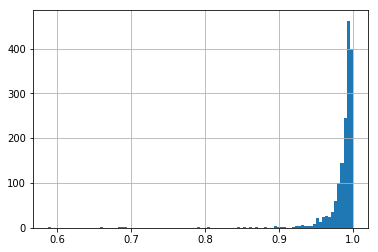

In [55]:
df1['similarity'].hist(bins = 100)

In [57]:
df1.to_csv('../../data/mean_similarity.csv')

In [2]:
df1 = pd.read_csv('../../data/mean_similarity.csv')

In [3]:
male = df1[df1.gender == 'Male']

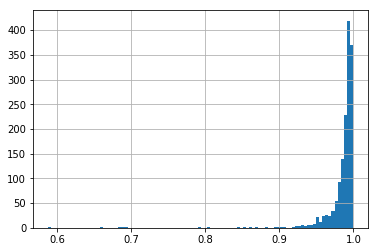

In [4]:
male['similarity'].hist(bins = 100)

In [5]:
female = df1[df1.gender == 'Female']

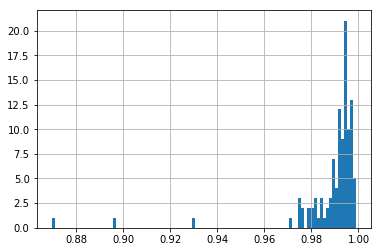

In [6]:
female['similarity'].hist(bins = 100)

In [7]:
d_test = df1.groupby('category').mean()

In [8]:
d_test

,Unnamed: 0,similarity
category,,
Masters Men 1 (40-49),811.272859,0.986730
Masters Men 2 (50-59),814.732639,0.981450
Masters Men 3 (60-69),858.500000,0.986624
Masters Women 1 (40-49),850.413043,0.988248
Masters Women 2 (50-59),853.555556,0.993680
Senior Men (23-39),785.016097,0.984169
Senior Women (23-39),779.538462,0.988332


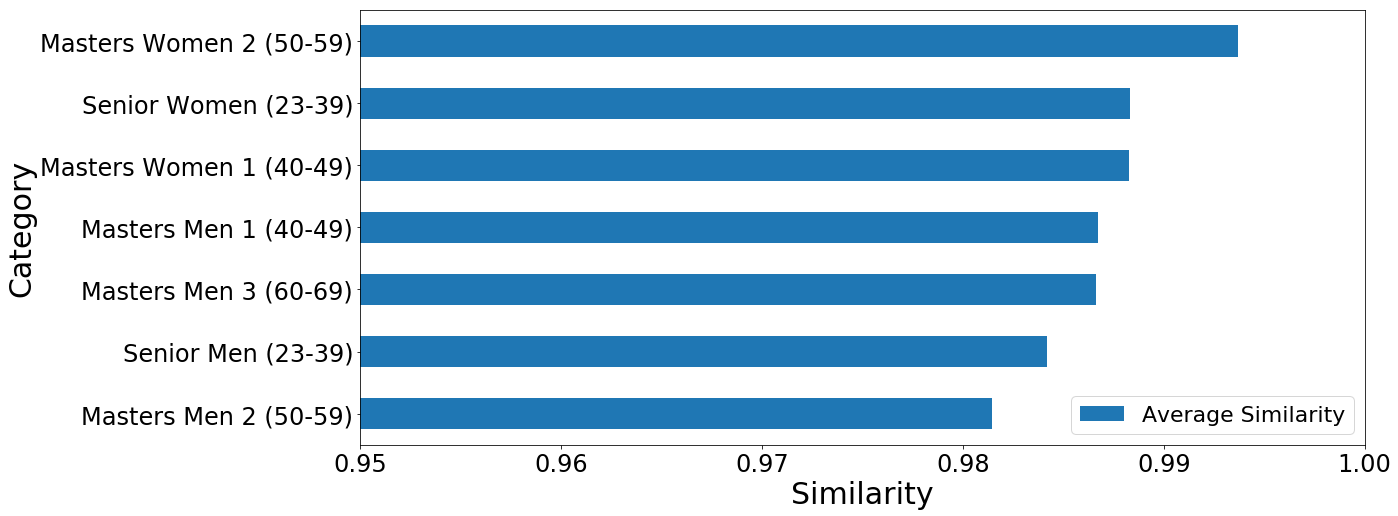

In [10]:
mean_plot = df1.groupby('category').mean()
#mean_plot.drop(mean_plot.index[8], inplace=True)
mean_plot = mean_plot.sort_values(by = 'similarity')
ax = mean_plot.plot.barh(y = 'similarity', rot=0, figsize = (18, 8), fontsize=24)
ax.set_ylabel('Category', fontsize = 30)
ax.set_xlabel('Similarity', fontsize = 30)
ax.set_xlim([0.95, 1])
ax.legend(['Average Similarity'], fontsize = 22, loc = 'lower right')


# Fastest Case Pacing Plan Recommendation RMSE

In [66]:
def differ_best(a, b):
    # Combine two lists (row and query run) into matrix
    matrix = pd.DataFrame({"A": a, "B": b})
    # Now drop any pairs containing NA so we only compare when we have two times
    matrix = matrix.dropna(axis = 0, how='any')
    # Parse back to two lists
    a = matrix[['A']]
    b = matrix[['B']]

    return sqrt(mean_squared_error(a, b))

def sims(index):

    pb_segs = list(pb.loc[index])

    result = best.apply(lambda row: differ_best(list(row), pb_segs), axis = 1)
   
    return result.loc[index]


sims(10)

5.1200630401083842

In [67]:
def update_rows_best(row):
    index = int(row['best rms error'])
    row['best rms error'] = sims(index)
   # row['ranked_mean'] = get_rank_mean(neighbours)
    return row

In [68]:
num_of_runs = wt['Chamonix to Delevret_pb'].count()
filler_data = np.arange(0.0, num_of_runs)
dfb = pd.DataFrame({'best rms error':filler_data})

dfb = dfb.apply(lambda row: update_rows_best(row), axis=1)
dfb = dfb[['best rms error']]
dfb

,best rms error
0,2.490526
1,3.080666
2,1.639875
3,2.490526
4,1.689517
5,4.177987
6,2.603400
7,4.501191
8,1.744597
9,2.718687


In [69]:
dfb.head()

,best rms error
0,2.490526
1,3.080666
2,1.639875
3,2.490526
4,1.689517


In [70]:
dfb.describe()

,best rms error
count,1609.000000
mean,3.100821
std,1.704212
min,0.000000
25%,2.112203
50%,2.886586
75%,3.789078
max,32.977067


In [71]:
dfb = comb.join(dfb)

In [72]:
dfb

,category,gender,best rms error
0,Senior Men (23-39),Male,2.490526
1,Senior Men (23-39),Male,3.080666
2,Senior Men (23-39),Male,1.639875
3,Masters Men 1 (40-49),Male,2.490526
4,Masters Men 1 (40-49),Male,1.689517
5,Masters Men 1 (40-49),Male,4.177987
6,Masters Men 1 (40-49),Male,2.603400
7,Senior Men (23-39),Male,4.501191
8,Senior Men (23-39),Male,1.744597
9,Senior Men (23-39),Male,2.718687


In [73]:
dfb.to_csv('../../data/best_row_error.csv')

In [74]:
dfb = pd.read_csv('../../data/best_row_error.csv')

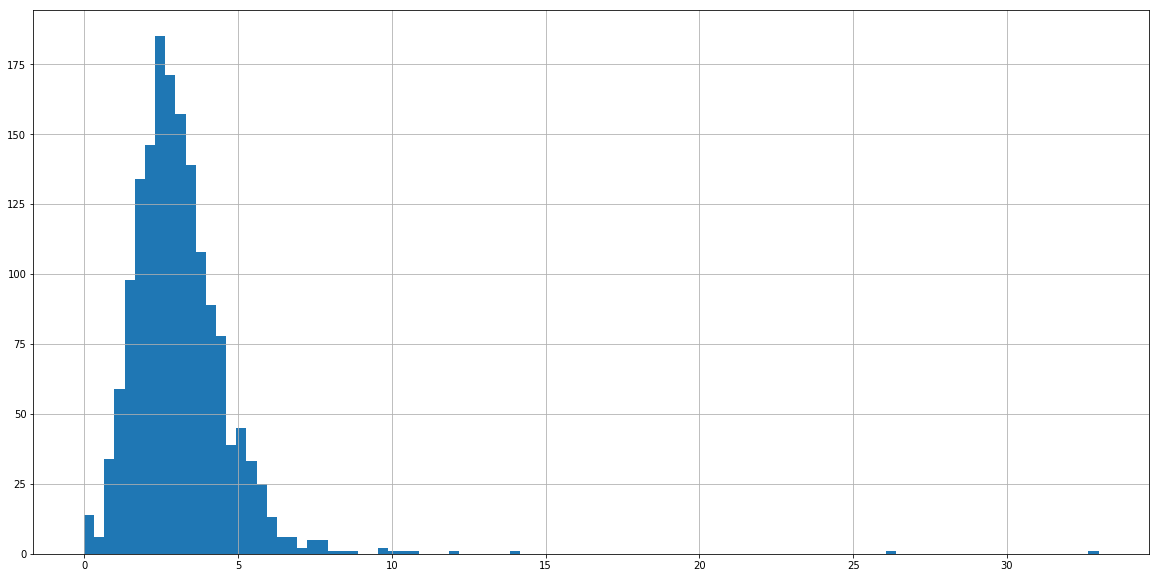

In [75]:
test = dfb['best rms error'].hist(bins = 100, figsize=(20, 10))


In [76]:
male1 = dfb[dfb.gender == 'Male']

In [78]:
female1 = dfb[dfb.gender == 'Female']

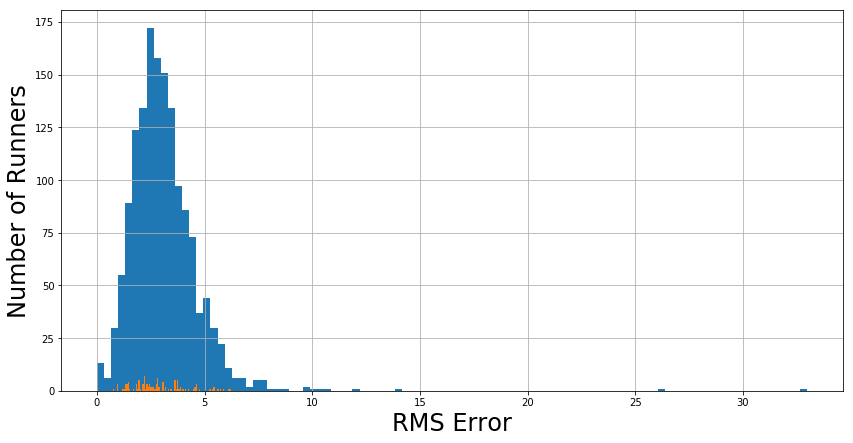

In [79]:
ax1 = male1['best rms error'].hist(bins = 100, figsize=(14, 7))
female1['best rms error'].hist(bins = 100)
ax1.set_ylabel('Number of Runners', fontsize = 24)
ax1.set_xlabel('RMS Error', fontsize = 24)
ax1.legend(fontsize = 14)

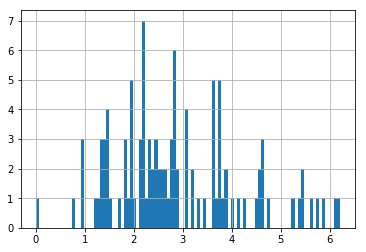

In [80]:
female1['best rms error'].hist(bins = 100)

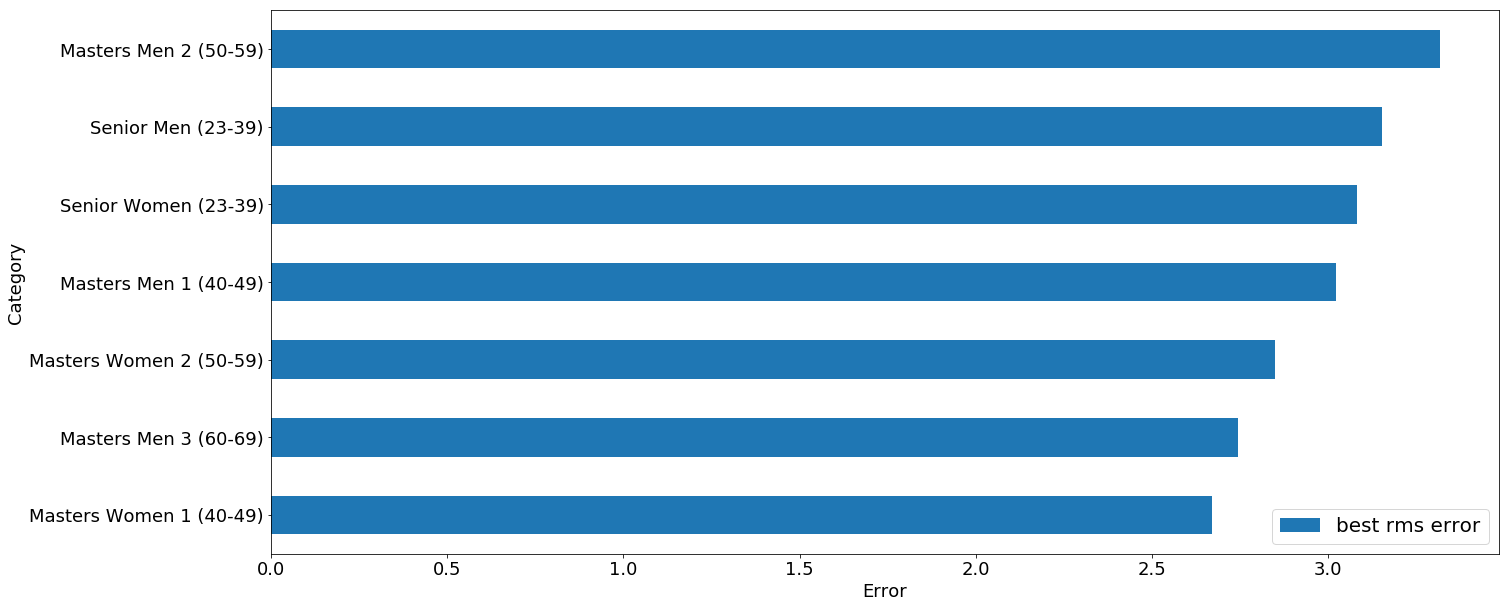

In [81]:
best_plot = dfb.groupby('category').mean()
best_plot = best_plot.sort_values(by = 'best rms error')
ax = best_plot.plot.barh(y = 'best rms error', rot=0, figsize = (22, 10), fontsize=18)
ax.set_ylabel('Category', fontsize = 18)
ax.set_xlabel('Error', fontsize = 18)
ax.legend(fontsize = 20)

In [82]:
best_plot


,Unnamed: 0,best rms error
category,,
Masters Women 1 (40-49),850.413043,2.669338
Masters Men 3 (60-69),858.500000,2.743240
Masters Women 2 (50-59),853.555556,2.850125
Masters Men 1 (40-49),811.272859,3.022113
Senior Women (23-39),779.538462,3.080042
Senior Men (23-39),785.016097,3.153042
Masters Men 2 (50-59),814.732639,3.317117


# Fastest Case Pacing Plan Recommendation Percentage Error

In [83]:
def differ_best(a, b):
    # Combine two lists (row and query run) into matrix
    matrix = pd.DataFrame({"A": a, "B": b})
    # Now drop any pairs containing NA so we only compare when we have two times
    matrix = matrix.dropna(axis = 0, how='any')
    # Parse back to two lists
    a = matrix[['A']]
    b = matrix[['B']]
    # Return cosine similarity (1 - cosine difference)
    return 1 - spatial.distance.cosine(a, b)

def sims_best(index):

    pb_segs = list(pb.loc[index])

    result = best.apply(lambda row: differ_best(list(row), pb_segs), axis = 1)
    
    return result.loc[index]
    

sims_best(90)

0.96691987354337849

In [84]:
def update_best(row):
    index = int(row['similarity'])
    row['similarity'] = sims_best(index)
   # row['ranked_mean'] = get_rank_mean(neighbours)
    return row

In [85]:
num_of_runs = best['Chamonix to Delevret_pb'].count()
filler_data = np.arange(0.0, num_of_runs)
df = pd.DataFrame({'similarity':filler_data})

df = df.apply(lambda row: update_best(row), axis=1)
df = df[['similarity']]
df

,similarity
0,0.988463
1,0.983861
2,0.994321
3,0.993062
4,0.993050
5,0.973293
6,0.993378
7,0.991226
8,0.994407
9,0.994554


In [87]:
df.to_csv('../../data/best_similarity.csv')

In [88]:
df1 = comb.join(df)

In [89]:
df1.head()

,category,gender,similarity
0,Senior Men (23-39),Male,0.988463
1,Senior Men (23-39),Male,0.983861
2,Senior Men (23-39),Male,0.994321
3,Masters Men 1 (40-49),Male,0.993062
4,Masters Men 1 (40-49),Male,0.993050


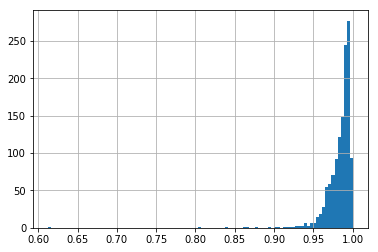

In [90]:
df1['similarity'].hist(bins = 100)

In [91]:
#df1.to_csv('../../data/mean_row_error.csv')

In [92]:
df1.to_csv('../../data/best_similarity.csv')

In [17]:
df1 = pd.read_csv('../../data/best_similarity.csv')

In [18]:
male = df1[df1.gender == 'Male']

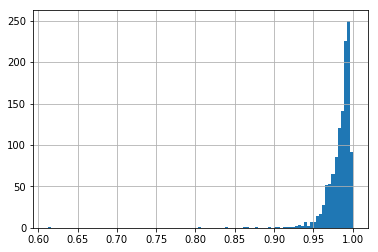

In [19]:
male['similarity'].hist(bins = 100)

In [20]:
female = df1[df1.gender == 'Female']

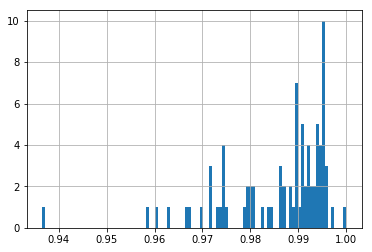

In [21]:
female['similarity'].hist(bins = 100)

In [22]:
d_test = df1.groupby('category').mean()

In [23]:
d_test

,Unnamed: 0,similarity
category,,
Masters Men 1 (40-49),811.272859,0.983422
Masters Men 2 (50-59),814.732639,0.983283
Masters Men 3 (60-69),858.500000,0.979175
Masters Women 1 (40-49),850.413043,0.984132
Masters Women 2 (50-59),853.555556,0.989690
Senior Men (23-39),785.016097,0.982115
Senior Women (23-39),779.538462,0.986963


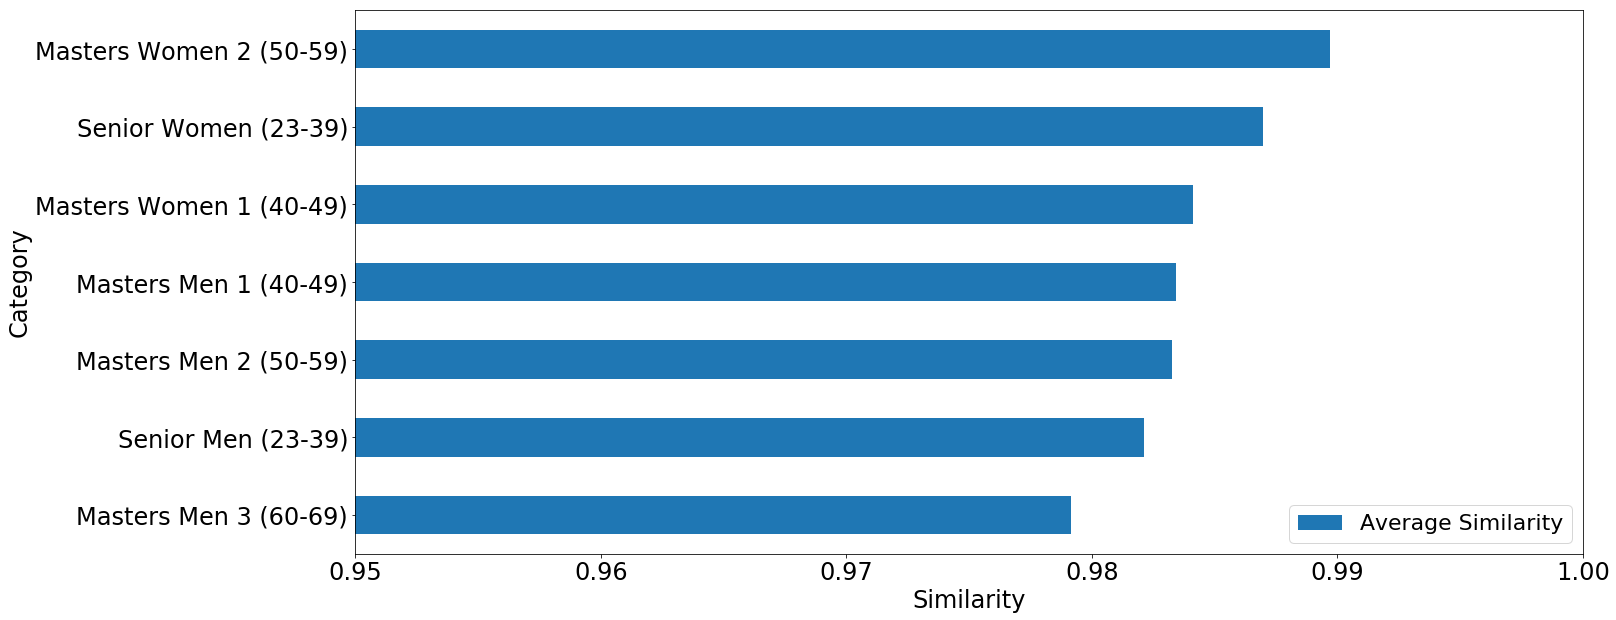

In [24]:
mean_plot = df1.groupby('category').mean()
#mean_plot.drop(mean_plot.index[8], inplace=True)
mean_plot = mean_plot.sort_values(by = 'similarity')
ax = mean_plot.plot.barh(y = 'similarity', rot=0, figsize = (22, 10), fontsize=24)
ax.set_ylabel('Category', fontsize = 24)
ax.set_xlabel('Similarity', fontsize = 24)
ax.set_xlim([0.95, 1])
ax.legend(['Average Similarity'], fontsize = 22, loc = 'lower right')


In [25]:
mm1 = df1[df1.category == 'Masters Men 1 (40-49)']
mm1 = mm1.similarity
mm2 = df1[df1.category == 'Masters Men 2 (50-59)']
mm2 = mm2.similarity
mm3 = df1[df1.category == 'Masters Men 3 (60-69)']
mm3 = mm3.similarity
mw1 = df1[df1.category == 'Masters Women 1 (40-49)']
mw1 = mw1.similarity
mw2 = df1[df1.category == 'Masters Women 2 (50-59)']
mw2 = mw2.similarity
sm = df1[df1.category == 'Senior Men (23-39)']
sm = sm.similarity
sw = df1[df1.category == 'Senior Women (23-39)']
sw = sw.similarity

In [26]:
fast = [mm2.mean(), sm.mean(), mm3.mean(), mm1.mean(), mw1.mean(), sw.mean(), mw2.mean()]

In [27]:
fast

[0.9832832054025998,
 0.982114964055772,
 0.9791745082458434,
 0.983421840176785,
 0.9841319496713777,
 0.9869626285916487,
 0.9896903336686492]

In [28]:
df3 = pd.read_csv('../../data/mean_similarity.csv')

In [29]:
df3.head()

,Unnamed: 0,category,gender,similarity
0,0,Senior Men (23-39),Male,0.989322
1,1,Senior Men (23-39),Male,0.991365
2,2,Senior Men (23-39),Male,0.990854
3,3,Masters Men 1 (40-49),Male,0.995019
4,4,Masters Men 1 (40-49),Male,0.997137


In [30]:
mm1 = df3[df3.category == 'Masters Men 1 (40-49)']
mm1 = mm1.similarity
mm2 = df3[df3.category == 'Masters Men 2 (50-59)']
mm2 = mm2.similarity
mm3 = df3[df3.category == 'Masters Men 3 (60-69)']
mm3 = mm3.similarity
mw1 = df3[df3.category == 'Masters Women 1 (40-49)']
mw1 = mw1.similarity
mw2 = df3[df3.category == 'Masters Women 2 (50-59)']
mw2 = mw2.similarity
sm = df3[df3.category == 'Senior Men (23-39)']
sm = sm.similarity
sw = df3[df3.category == 'Senior Women (23-39)']
sw = sw.similarity

In [31]:
mean = [mm2.mean(), sm.mean(), mm3.mean(), mm1.mean(), mw1.mean(), sw.mean(), mw2.mean()]

In [32]:
mean

[0.9814496385212546,
 0.9841692857768302,
 0.9866242095516548,
 0.9867295012020325,
 0.9882482021669764,
 0.9883320784002444,
 0.9936799801779286]

(0.95, 1)

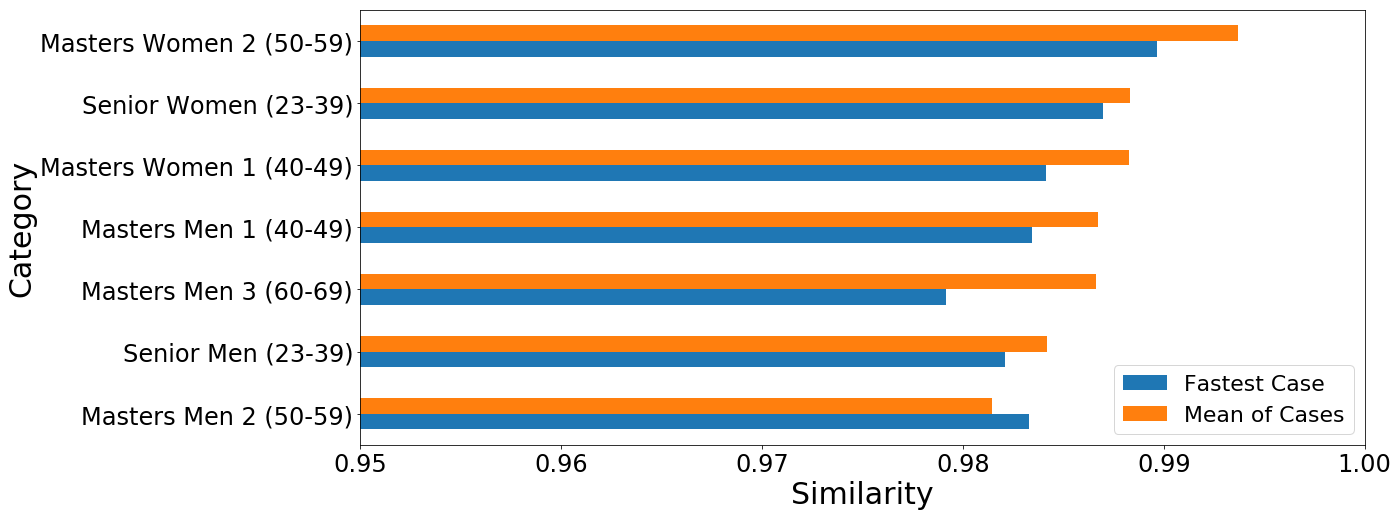

In [35]:
index = ['Masters Men 2 (50-59)', 'Senior Men (23-39)', 'Masters Men 3 (60-69)', 'Masters Men 1 (40-49)', 'Masters Women 1 (40-49)', 'Senior Women (23-39)', 'Masters Women 2 (50-59)']
gra_w = pd.DataFrame({'Fastest Case': fast, 'Mean of Cases': mean}, index=index)
ax = gra_w.plot.barh(figsize=(18, 8), fontsize=24, rot=0)
ax.set_ylabel('Category', fontsize = 30)
ax.set_xlabel('Similarity', fontsize = 30)
ax.legend(fontsize = 22)
ax.set_xlim([0.95, 1])

The cosine similarity is found between the common columns of the recommended pacing plan
and the actual PB pacing plan. The average per category is calculated. The mean of cases and
fastest case recommendations were compared.
The similarities for each category are all above 0.98 for the mean of cases pacing plan recommendation, which is very high. Interestingly, the categories with the top 3 highest similarities are the
three female categories. This is following the similar trend to the average pace predictions, where
female runners always had a lower percentage error when predictions were made. In relation to
categorical age, there does not seem to be a particular trend. Masters Women 2 (50-59) has the
highest cosine similarity, whereas the male equivalent has the lowest cosine similarity. Similarly,
Senior Women (23-39) is the second highest in terms of similarity, and Senior Men (23-39) is the
second lowest. Therefore, being a certain age does not seem to offer an advantage in terms of
achieving a better recommendation. The similarities are also very high for the fastest case pacing
plan recommendation. Masters Men 3 (60-69) is the only category under 0.98. Each category
has a marginally lower similarity than the mean of cases recommendation. The female categories
have the best results in terms of similarity once again.
